EDA for blackout data 

- capture a correalation between outage frequency and climate data - eg. seasonality in outages

- (likes: seasonal charts x-axis jan - dec )

In [1]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd

# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 1000

plt.style.use('seaborn-darkgrid')

In [9]:
# input dir
# change to current directory of this notebook


input_dir = '../../data'
df_blackout = pd.read_csv(os.path.join(input_dir, 'df_blackout.csv'))

# output dir
output_dir = '../plots'
output_file = os.path.join(output_dir, 'EDA_blackout.csv')

In [77]:
df_blackout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280406 entries, 0 to 7280405
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   hour          object 
 1   pct_blackout  float64
 2   station_id    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 166.6+ MB


In [78]:
# check for missing values
df_blackout.isnull().sum()

hour            0
pct_blackout    0
station_id      0
dtype: int64

In [79]:
# check for duplicates
df_blackout.duplicated().sum()

0

In [80]:
df_blackout.rename(columns={'hour': 'datetime'}, inplace=True)

df_blackout['datetime'] = pd.to_datetime(df_blackout['datetime'])

In [81]:

df_blackout['year'] = pd.to_datetime(df_blackout['datetime']).dt.year
df_blackout['month'] = pd.to_datetime(df_blackout['datetime']).dt.month
df_blackout['day'] = pd.to_datetime(df_blackout['datetime']).dt.day
df_blackout['hour'] = pd.to_datetime(df_blackout['datetime']).dt.hour


In [82]:

df_blackout.head()
print(df_blackout.describe())

       pct_blackout    station_id          year         month           day  \
count  7.280406e+06  7.280406e+06  7.280406e+06  7.280406e+06  7.280406e+06   
mean   1.023182e-01  3.031134e+02  2.017355e+03  6.701509e+00  1.576517e+01   
std    2.744799e-01  1.720610e+02  1.795107e+00  3.464773e+00  8.798179e+00   
min    0.000000e+00  1.000000e+00  2.014000e+03  1.000000e+00  1.000000e+00   
25%    0.000000e+00  1.580000e+02  2.016000e+03  4.000000e+00  8.000000e+00   
50%    0.000000e+00  3.040000e+02  2.017000e+03  7.000000e+00  1.600000e+01   
75%    0.000000e+00  4.640000e+02  2.018000e+03  1.000000e+01  2.300000e+01   
max    1.000000e+00  5.710000e+02  2.023000e+03  1.200000e+01  3.100000e+01   

               hour  
count  7.280406e+06  
mean   1.149182e+01  
std    6.922512e+00  
min    0.000000e+00  
25%    5.000000e+00  
50%    1.100000e+01  
75%    1.700000e+01  
max    2.300000e+01  


In [83]:
## 1 Distribution of Blackout Pecentage

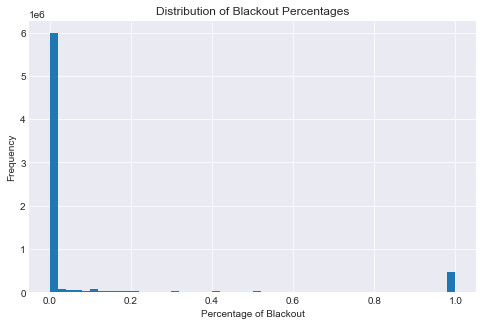

In [84]:
# Histogram of blackout percentage
plt.figure(figsize=(8, 5))
df_blackout['pct_blackout'].hist(bins=50)
plt.title('Distribution of Blackout Percentages')
plt.xlabel('Percentage of Blackout')
plt.ylabel('Frequency')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'hist_blackout_percentage.png'), dpi=600)

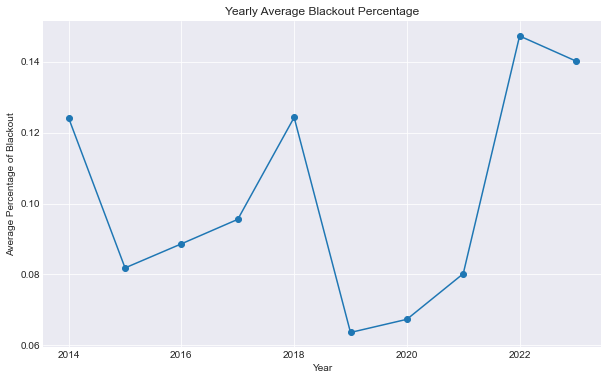

In [85]:
# Yearly trend
df_blackout.groupby('year')['pct_blackout'].mean().plot(
    kind='line', marker='o', figsize=(10, 6))
plt.title('Yearly Average Blackout Percentage')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Blackout')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'yearly_blackout_percentage.png'), dpi=600)


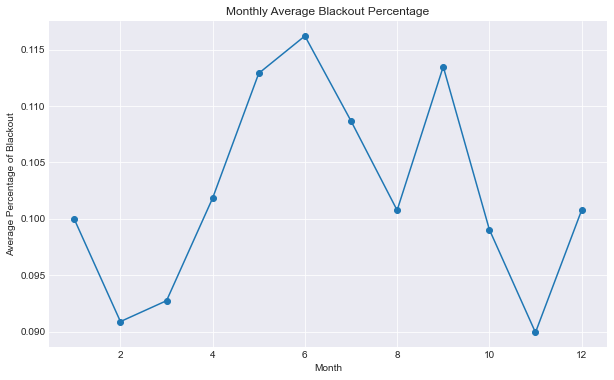

In [86]:

# Monthly trend
df_blackout.groupby('month')['pct_blackout'].mean().plot(
    kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Average Blackout Percentage')
plt.xlabel('Month')
plt.ylabel('Average Percentage of Blackout')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'monthly_blackout_percentage.png'), dpi=600)

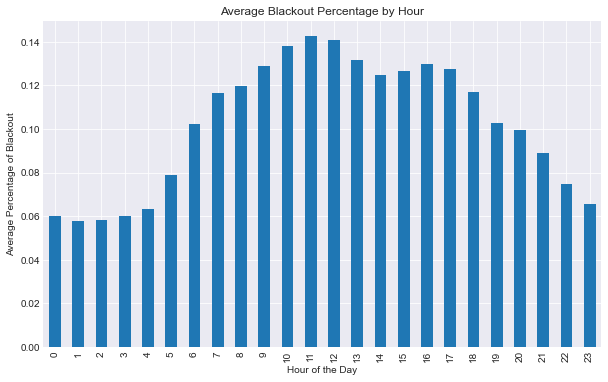

In [87]:
# Average blackout percentage by hour
df_blackout.groupby('hour')['pct_blackout'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Blackout Percentage by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Percentage of Blackout')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'hourly_blackout_percentage.png'), dpi=600)

In [88]:

df_blackout.set_index('datetime', inplace=True)

In [89]:
df_blackout.info()

df_blackout.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7280406 entries, 2015-10-08 00:00:00 to 2018-02-21 07:00:00
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pct_blackout  float64
 1   station_id    int64  
 2   year          int64  
 3   month         int64  
 4   day           int64  
 5   hour          int64  
dtypes: float64(1), int64(5)
memory usage: 388.8 MB


DatetimeIndex(['2015-10-08 00:00:00', '2015-10-08 01:00:00',
               '2015-10-08 02:00:00', '2015-10-08 03:00:00',
               '2015-10-08 04:00:00', '2015-10-08 05:00:00',
               '2015-10-08 06:00:00', '2015-10-08 07:00:00',
               '2015-10-08 08:00:00', '2015-10-08 09:00:00',
               ...
               '2018-02-15 21:00:00', '2018-02-15 22:00:00',
               '2018-02-21 00:00:00', '2018-02-21 01:00:00',
               '2018-02-21 02:00:00', '2018-02-21 03:00:00',
               '2018-02-21 04:00:00', '2018-02-21 05:00:00',
               '2018-02-21 06:00:00', '2018-02-21 07:00:00'],
              dtype='datetime64[ns]', name='datetime', length=7280406, freq=None)

## 4 Time Series Analysis

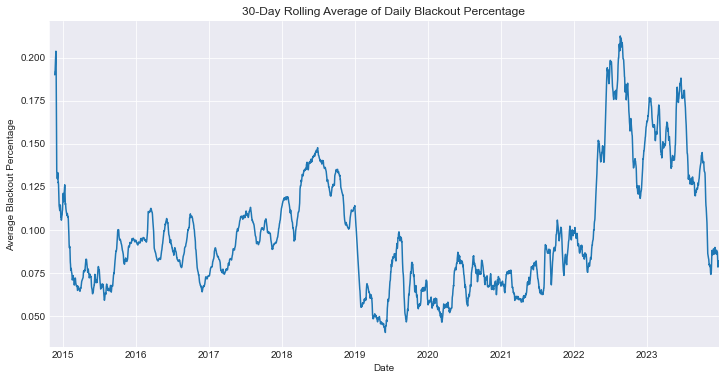

In [90]:
# df_blackout.info()
# df_blackout.set_index('datetime', inplace=True)

# Resample to daily average blackout percentage
daily_avg_blackout = df_blackout['pct_blackout'].resample('D').mean()

# Plot the rolling mean for trend analysis
daily_avg_blackout.rolling(window=30).mean().plot(figsize=(12, 6))
plt.title('30-Day Rolling Average of Daily Blackout Percentage')
plt.xlabel('Date')
plt.ylabel('Average Blackout Percentage')
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, 'time_series_30days_rolling_avg_blackout_percentage.png'), dpi=600)



### Mapping


In [92]:

# Load geospatial data with station coordinates
# read the geospatial data(geojson) with gpd
geo_df = gpd.read_file(os.path.join(input_dir, 'STATION.geojson'))

# join the geospatial data with the blackout data
df_blackout_geo = pd.merge(df_blackout, geo_df, on='station_id', how='left')

df_blackout_geo.head()
df_blackout_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280406 entries, 0 to 7280405
Data columns (total 16 columns):
 #   Column             Dtype   
---  ------             -----   
 0   pct_blackout       float64 
 1   station_id         int64   
 2   year               int64   
 3   month              int64   
 4   day                int64   
 5   hour               int64   
 6   Location name      object  
 7   ESMI_ID            float64 
 8   Category           object  
 9   Connection Type    object  
 10  Lat                float64 
 11  Lon                float64 
 12  climate_zone_DN    float64 
 13  climate_zone_name  object  
 14  climate_zone_code  object  
 15  geometry           geometry
dtypes: float64(5), geometry(1), int64(5), object(5)
memory usage: 944.3+ MB


In [ ]:
# base map: india polygon
india_gdf = gpd.read_file(
    '../../data/helper/Indian_Climate_Zone(dissolved).geojson')


In [ ]:
# Plot the station with the average blackout percentage as color on map
# calculate average blackout percentage by station
station_avg_blackout = df_blackout_geo.groupby(
	'station_id')['pct_blackout'].mean().reset_index()

station_avg_blackout.head()

# merge the average blackout percentage with the geospatial data
geo_df = pd.merge(geo_df, station_avg_blackout, on='station_id', how='left')


/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_77932/190233317.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'pct_blackout_y'} in the result is deprecated and will raise a MergeError in a future version.
  top5_stations = pd.merge(top5_stations, geo_df, on='station_id', how='left')


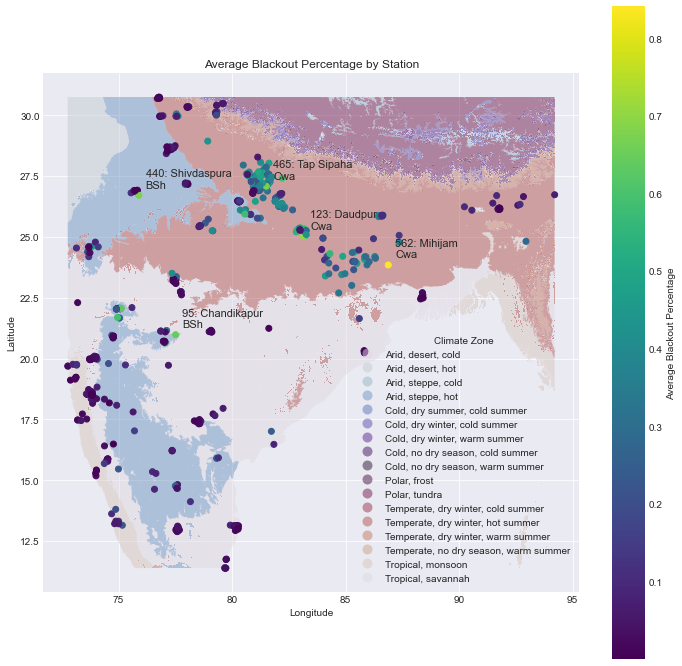

In [120]:

fig, ax = plt.subplots(figsize=(12, 12))


india_gdf.plot(column='name_climate', legend_kwds={
               'title': 'Climate Zone'}, cmap='twilight', ax=ax, legend=True, alpha=0.5)

geo_df.plot(column='pct_blackout', ax=ax, legend=True, cmap='viridis',
            legend_kwds={'label': "Average Blackout Percentage"})

plt.title('Average Blackout Percentage by Station')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# add the top 5 stations with highest blackout percentage, add the station name and id to the plot
top5_stations = df_blackout_geo.groupby('station_id')['pct_blackout'].mean().nlargest(5).reset_index()
top5_stations = pd.merge(top5_stations, geo_df, on='station_id', how='left')

for i in range(top5_stations.shape[0]):
    plt.text(top5_stations['Lon'][i] + 0.3, top5_stations['Lat'][i] + 0.3, f"{top5_stations['station_id'][i]}: {top5_stations['Location name'][i]}\n{top5_stations['climate_zone_code'][i]}",
             fontsize=11, ha='left')
    

plt.savefig(os.path.join(output_dir, 'map_blackout_percentage.png'), dpi=600)

In [121]:
top5_stations.head()

,station_id,pct_blackout_x,Location name,ESMI_ID,Category,Connection Type,Lat,Lon,climate_zone_DN,climate_zone_name,climate_zone_code,geometry,pct_blackout_x,pct_blackout_y,pct_blackout_x,pct_blackout_y,pct_blackout_x,pct_blackout_y,pct_blackout_y
0,562,0.841157,Mihijam,899.0,None,None,23.848367,86.877524,11.0,"Temperate, dry winter, hot summer",Cwa,POINT (86.87752 23.84837),0.841157,0.841157,0.841157,0.841157,0.841157,0.841157,0.841157
1,123,0.711835,Daudpur,NaN,Gram Panchayat,Domestic,25.030930,83.142728,11.0,"Temperate, dry winter, hot summer",Cwa,POINT (83.14273 25.03093),0.711835,0.711835,0.711835,0.711835,0.711835,0.711835,0.711835
2,440,0.674794,Shivdaspura,NaN,Gram Panchayat,Non Domestic,26.709301,75.895867,6.0,"Arid, steppe, hot",BSh,POINT (75.89587 26.70930),0.674794,0.674794,0.674794,0.674794,0.674794,0.674794,0.674794
3,465,0.671759,Tap Sipaha,NaN,Gram Panchayat,Domestic,27.083844,81.505952,11.0,"Temperate, dry winter, hot summer",Cwa,POINT (81.50595 27.08384),0.671759,0.671759,0.671759,0.671759,0.671759,0.671759,0.671759
4,95,0.645684,Chandikapur,NaN,Gram Panchayat,Agriculture,20.983001,77.507814,6.0,"Arid, steppe, hot",BSh,POINT (77.50781 20.98300),0.645684,0.645684,0.645684,0.645684,0.645684,0.645684,0.645684


In [127]:

# geo_df.drop(columns=['pct_blackout_x', 'pct_blackout_y'], inplace=True)
geo_df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   station_id         538 non-null    int64   
 1   Location name      538 non-null    object  
 2   ESMI_ID            45 non-null     float64 
 3   Category           510 non-null    object  
 4   Connection Type    509 non-null    object  
 5   Lat                538 non-null    float64 
 6   Lon                538 non-null    float64 
 7   climate_zone_DN    535 non-null    float64 
 8   climate_zone_name  535 non-null    object  
 9   climate_zone_code  535 non-null    object  
 10  geometry           538 non-null    geometry
 11  pct_blackout       536 non-null    float64 
dtypes: float64(5), geometry(1), int64(1), object(5)
memory usage: 54.6+ KB


In [135]:

# check correlation between blackout percentage and climate zone

# One-hot encoding for climate zone

geo_df_cor = geo_df.drop(columns=['ESMI_ID', 'climate_zone_DN'])
geo_df_cor.head()


,station_id,Location name,Category,Connection Type,Lat,Lon,climate_zone_name,geometry,pct_blackout,climate_zone_code_Am,climate_zone_code_Aw,climate_zone_code_BSh,climate_zone_code_Cwa,climate_zone_code_Cwb,climate_zone_code_Dwb
0,1,5th phase JP Nagar,State Capital,Domestic,12.901092,77.589150,"Tropical, savannah",POINT (77.58915 12.90109),0.141416,0,1,0,0,0,0
1,4,Adgaon,Gram Panchayat,Domestic,20.037184,73.850136,"Tropical, savannah",POINT (73.85014 20.03718),0.022502,0,1,0,0,0,0
2,10,Akoli Jehangir,Gram Panchayat,Domestic,21.154837,77.118466,"Tropical, savannah",POINT (77.11847 21.15484),0.283676,0,1,0,0,0,0
3,11,Akot,Other Municipal Area,Domestic,21.095987,77.054704,"Tropical, savannah",POINT (77.05470 21.09599),0.029545,0,1,0,0,0,0
4,13,Alandur,State Capital,Domestic,13.000882,80.199303,"Tropical, savannah",POINT (80.19930 13.00088),0.025166,0,1,0,0,0,0


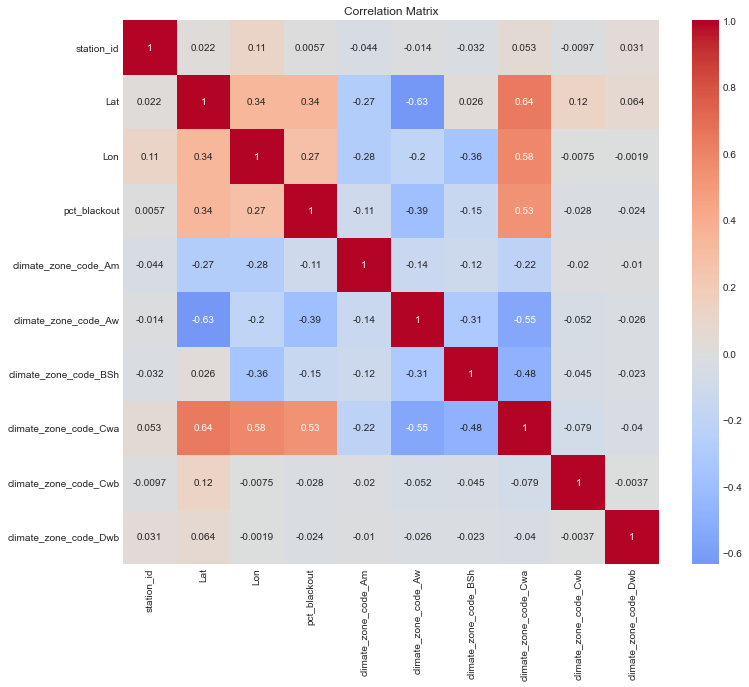

In [136]:



# Correlation matrix
correlation_matrix = geo_df_cor.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(output_dir, 'correlation_matrix_blackout_climate_zone.png'), dpi=600)

In [ ]:


# Correlation matrix
correlation_matrix = geo_df_cor.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(
    output_dir, 'correlation_matrix_blackout_climate_zone.png'), dpi=600)

In [14]:


# Correlation matrix
correlation_matrix = geo_df_cor.corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(
    output_dir, 'correlation_matrix_blackout_climate_zone_spearman.png'), dpi=600)

NameError: name 'geo_df_cor' is not defined

# todo:

1. time series analysis: more plots, explain 30 days avg

2. eda in final inner join df: correlation matrix

3. add notebook7 to github

4. update ppt slides




In [4]:
# read the final data

# input dir
input_dir = '../../data/final'

df_final = pd.read_csv(os.path.join(input_dir, 'df_merged_inner.csv'))



/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_5504/3192552403.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(os.path.join(input_dir, 'df_merged_inner.csv'))


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280406 entries, 0 to 7280405
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   datetime         object 
 2   Location name    object 
 3   ESMI_ID          float64
 4   District         object 
 5   State            object 
 6   Category         object 
 7   Connection Type  object 
 8   Lat              float64
 9   Lon              float64
 10  t2m              float64
 11  u10              float64
 12  v10              float64
 13  tp               float64
 14  date             int64  
 15  time             int64  
 16  station_id       int64  
 17  pct_blackout     float64
dtypes: float64(8), int64(4), object(6)
memory usage: 999.8+ MB


In [15]:
# aggregate the blackout percentage by station
station_avg_blackout = df_final.groupby(
	'station_id')['pct_blackout'].mean().reset_index()

station_avg_blackout.head()

# merge the average blackout percentage with the geospatial data
geo_df = pd.merge(geo_df, station_avg_blackout, on='station_id', how='left')



NameError: name 'geo_df' is not defined

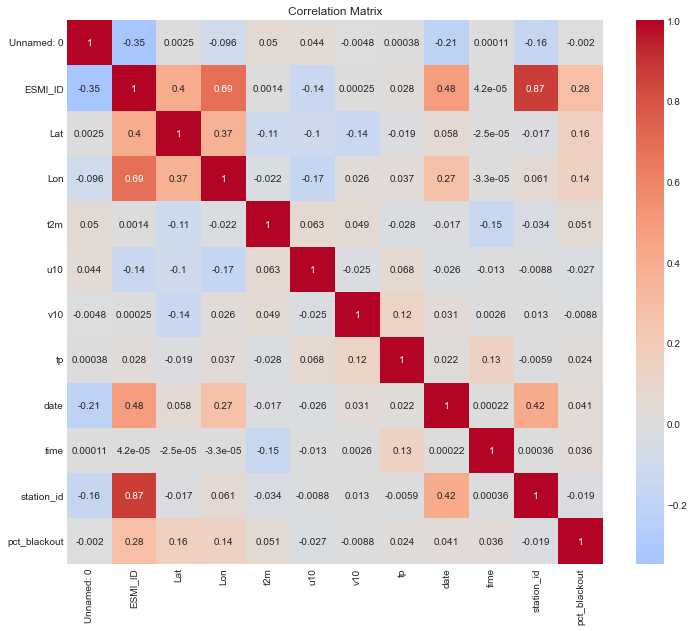

In [13]:
output_dir = '../../plots'
plt.style.use('seaborn-darkgrid')

# correlation matrix
correlation_matrix = df_final.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')


plt.savefig(os.path.join(output_dir, 'correlation_matrix_final.png'), dpi=600)